# Import and Config

In [1]:
import pandas as pd
import seaborn as sns
import ast

# Load Data

In [7]:
df = pd.read_csv('../data/biored_raw.csv')

# Exploration

In [8]:
df.shape

(21480, 13)

In [9]:
df.head()

,instance_id,subreddit,post_id,sentence_id,post_title,text,annotated_labels,majority_labels,consensus_spans,num_annotators,span_level_agreement,group,auto_labels
0,104545801,offmychest,v502z3,0,Just ended my first relationship and I feel re...,I (22) ended my first relationship and feel gr...,"['[{""end"":6,""text"":""I (22)"",""start"":0,""labels""...",['per:age'],"[{'start': 0, 'end': 6, 'labels': ['per:age']}]",4,62.500000,group_0,age: information on age of a person;per: partn...
1,104545802,offmychest,yg091o,74,I had this idea of you,"And I have never known the love of my family, ...",[],['no_relation'],[],2,100.000000,group_0,per: parents: information on whether a person ...
2,104545803,offmychest,11zyznk,0,"I miss being a ""sex worker"" even though I'm in...","I , 23F , have been dating my boyfriend, 24M f...","['[{""end"":6,""text"":""I , 23"",""start"":0,""labels""...",['per:age'],"[{'start': 0, 'end': 6, 'labels': ['per:age']}]",5,50.238095,group_0,age: information on age of a person;sex or gen...
3,104545804,offmychest,xky3fc,1,everyone is losing love for me,The people in my life whom I owe to still bein...,"['[{""end"":79,""text"":""my mother and Girlfriend""...",['per: other family members'],"[{'start': 55, 'end': 79, 'labels': ['per: oth...",4,33.333333,group_0,per: children: information on whether a person...
4,104545805,offmychest,y0i42x,1,I absolutely HATE remote work,I live in a house with my boyfriend and two pe...,"['[{""end"":35,""text"":""my boyfriend"",""start"":23,...","['possessions', 'unclear / uncertain']","[{'start': 12, 'end': 17, 'labels': ['possessi...",3,2.777778,group_0,age: information on age of a person;per: child...


In [10]:
df.isnull().sum()

instance_id                0
subreddit                  0
post_id                    0
sentence_id                0
post_title              4222
text                       0
annotated_labels           0
majority_labels            0
consensus_spans            0
num_annotators             0
span_level_agreement    2136
group                      0
auto_labels             1330
dtype: int64

In [9]:
df['post_id'].nunique()

9635

In [15]:
df[['post_id', 'sentence_id']].drop_duplicates().shape[0]


10864

In [14]:
df['text'].nunique()
#TODO: check further

10760

<Axes: xlabel='sentence_id', ylabel='Count'>

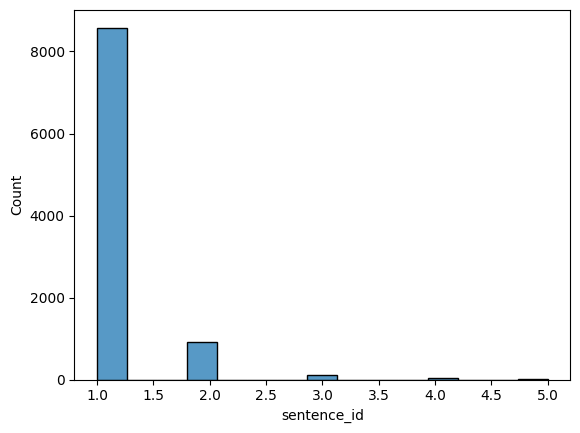

In [28]:
x = df.groupby('post_id').nunique()['sentence_id']
sns.histplot(x)

<Axes: xlabel='num_annotators', ylabel='Count'>

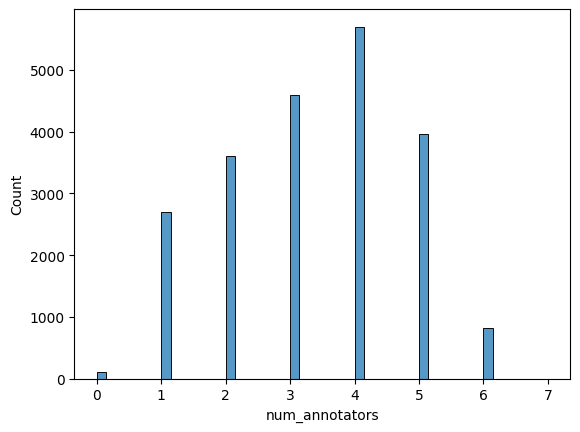

In [30]:
sns.histplot(df['num_annotators'])

In [18]:
import ast, json

def parse_outer_list(cell):
    if isinstance(cell, list):
        return cell
    if not isinstance(cell, str) or not cell.strip():
        return []
    try:
        return ast.literal_eval(cell)   # z. B. "['[...]','[...]']"
    except Exception:
        try:
            return json.loads(cell)
        except Exception:
            return []

def parse_inner_json(entry):
    if isinstance(entry, list):
        return entry
    if isinstance(entry, str):
        return json.loads(entry)        # z. B. '[{...},{...}]'
    return []

def print_first_with_multiple_starts(df, col="annotated_labels"):
    for row_idx, cell in df[col].items():
        outer = parse_outer_list(cell)          # Liste von inneren JSON-Arrays (als String)
        for ann_idx, inner in enumerate(outer):
            spans = parse_inner_json(inner)     # Liste[Dict]
            starts = [d.get('start') for d in spans if isinstance(d, dict) and 'start' in d]
            if len(starts) > 1:                 # mehr als ein start in dieser Annotation
                print(f"Erster Treffer in Zeile {row_idx}, Annotator {ann_idx}:\n")
                print("ORIGINAL-CELL:")
                print(cell, "\n")
                print("ANNOTATION MIT >1 'start':")
                print(spans)
                return (row_idx, ann_idx, spans)  # optional zurückgeben
    print("Kein Fall mit >1 'start' gefunden.")
    return None

# Aufruf:
print_first_with_multiple_starts(df, col="annotated_labels")

Erster Treffer in Zeile 0, Annotator 2:

ORIGINAL-CELL:
['[{"end":6,"text":"I (22)","start":0,"labels":["per:age"]}]', '[{"end":6,"text":"I (22)","start":0,"labels":["per:age"]}]', '[{"end":1,"text":"I","start":0,"labels":["per:age"]},{"end":5,"text":"22","start":3,"labels":["per:age"]}]', '[{"end":6,"text":"I (22)","start":0,"labels":["per:age"]}]'] 

ANNOTATION MIT >1 'start':
[{'end': 1, 'text': 'I', 'start': 0, 'labels': ['per:age']}, {'end': 5, 'text': '22', 'start': 3, 'labels': ['per:age']}]


(0,
 2,
 [{'end': 1, 'text': 'I', 'start': 0, 'labels': ['per:age']},
  {'end': 5, 'text': '22', 'start': 3, 'labels': ['per:age']}])